<a href="https://colab.research.google.com/github/Megalonnix/ChallengeAluraStore/blob/master/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [90]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [91]:
# 0. Lista de Faturamento individual por loja:
faturamentos_ = []

# 2. Função para agilizar coleta de faturamentos, dependendo do nome da loja:
def obterFaturamento(n_loja):
  if (n_loja == None):
    return round(sum(loja['Preço']),2)
  else: return round(sum(globals()[f'loja{n_loja}']['Preço']), 2)

# 3. Coleta de cada faturamento individual e armazenamento do mesmo na lista.
def pushFaturamento(n_loja = None):
  faturamento_loja = obterFaturamento(n_loja)
  if len(faturamentos_) < 4:
    faturamentos_.append(faturamento_loja)
  return faturamentos_

In [92]:
pushFaturamento()
pushFaturamento(2)
pushFaturamento(3)
pushFaturamento(4)

print(f'Faturamento Loja 1: R$ {faturamentos_[0]}')
print(f'Faturamento Loja 2: R$ {faturamentos_[1]}')
print(f'Faturamento Loja 3: R$ {faturamentos_[2]}')
print(f'Faturamento Loja 4: R$ {faturamentos_[3]}')

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


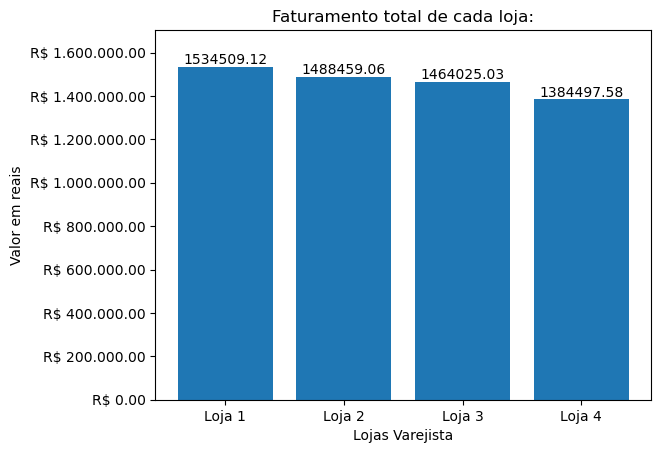

In [93]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Dados Gráfico de Barras:
categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = faturamentos_

# Criando o gráfico de barras
plt.bar(categorias, valores)

# Adicionando título e rótulos
plt.title('Faturamento total de cada loja:')
plt.xlabel('Lojas Varejista')
plt.ylabel('Valor em reais')

# Formatação com ponto como separador
formatoEixoY = ticker\
  .FuncFormatter(
      lambda
      vlEixoY,
      argNaoUtilizado: f'R$ {vlEixoY:,.2f}'.replace(',', '.'))

# ---------------------
# NOTA DE APRENDIZADO:
# ---------------------
# plt.gca()                          => Get Current Axes (Pegou os eixos que eu fiz).
# .yaxis                             => Acessa o eixo Y.
# .set_major_formatter(formatoEixoY) => Define o formato que eu gerei nas linhas ACIMA.

plt.gca()\
   .yaxis\
   .set_major_formatter(formatoEixoY)

# Valores em cima das barras do gráfico:
for i, vlr in enumerate(valores):
  plt.text(
      i,
      vlr,
      f'{round(vlr,2)}',
      ha='center',
      va='bottom',
      fontsize=10)

# Exibindo o gráfico
plt.ylim(0, max(valores) * 1.11) # Ajuste no teto do gráfico
plt.show()


# 2. Vendas por Categoria


In [94]:
# Análise de categorias existentes no dataset (não sei quantas existem) :
categorias_existentes = list(loja['Categoria do Produto'].unique())
qtd_categorias = len(categorias_existentes)

info_categorias = {
  'categorias': categorias_existentes,
  'qtd_categorias': qtd_categorias
}

# Já averiquei, todas as lojas possuem a mesma qtd de categorias:
info_categorias

{'categorias': ['eletronicos',
  'moveis',
  'brinquedos',
  'eletrodomesticos',
  'utilidades domesticas',
  'esporte e lazer',
  'livros',
  'instrumentos musicais'],
 'qtd_categorias': 8}

In [95]:
# Obter um objeto informativo
# c/ quantidade de vendas exatas em cada loja individual:

def getQtdVendasPorCtgNaLoja(numLoja = None):

  tituloObj = 'Vendas por categoria Loja'
  resultado = ['']
  nmloja = ""

  if numLoja == None:
    resultado[0] = tituloObj + ' 1:'
    nmloja = f'loja{""}'
  else:
    resultado[0] = \
    tituloObj + f' {numLoja}:'
    nmloja = f'loja{numLoja}'

  for i in info_categorias['categorias']:
    nm_categoria = i
    vendasPorCategoria = len(
      [ j for j in globals()[nmloja]['Categoria do Produto'] if j == f'{nm_categoria}'])
    resultado.append([f'{nm_categoria}:', vendasPorCategoria])

  return resultado

In [96]:
ctgGlobalVendasPorCategoria = [
  getQtdVendasPorCtgNaLoja(),
  getQtdVendasPorCtgNaLoja(2),
  getQtdVendasPorCtgNaLoja(3),
  getQtdVendasPorCtgNaLoja(4)
]

ctgGlobalVendasPorCategoria

[['Vendas por categoria Loja 1:',
  ['eletronicos:', 448],
  ['moveis:', 465],
  ['brinquedos:', 324],
  ['eletrodomesticos:', 312],
  ['utilidades domesticas:', 171],
  ['esporte e lazer:', 284],
  ['livros:', 173],
  ['instrumentos musicais:', 182]],
 ['Vendas por categoria Loja 2:',
  ['eletronicos:', 422],
  ['moveis:', 442],
  ['brinquedos:', 313],
  ['eletrodomesticos:', 305],
  ['utilidades domesticas:', 181],
  ['esporte e lazer:', 275],
  ['livros:', 197],
  ['instrumentos musicais:', 224]],
 ['Vendas por categoria Loja 3:',
  ['eletronicos:', 451],
  ['moveis:', 499],
  ['brinquedos:', 315],
  ['eletrodomesticos:', 278],
  ['utilidades domesticas:', 177],
  ['esporte e lazer:', 277],
  ['livros:', 185],
  ['instrumentos musicais:', 177]],
 ['Vendas por categoria Loja 4:',
  ['eletronicos:', 451],
  ['moveis:', 480],
  ['brinquedos:', 338],
  ['eletrodomesticos:', 254],
  ['utilidades domesticas:', 201],
  ['esporte e lazer:', 277],
  ['livros:', 187],
  ['instrumentos musicai

In [97]:
# import matplotlib.pyplot as plt

# categorias = ['a','b','c','d','e','f','g']
# valores = [10,20,10,30,90,23,78]

# plt.bar(categorias, valores)

def getCategoriasProds():
  return [categoria for categoria in info_categorias['categorias']]

def extrairQtdVendasLoja(numLoja = None):
  dados_loja = getQtdVendasPorCtgNaLoja(numLoja)
  return [dados_loja[idx][1] for idx in range(len(dados_loja)) if idx > 0]

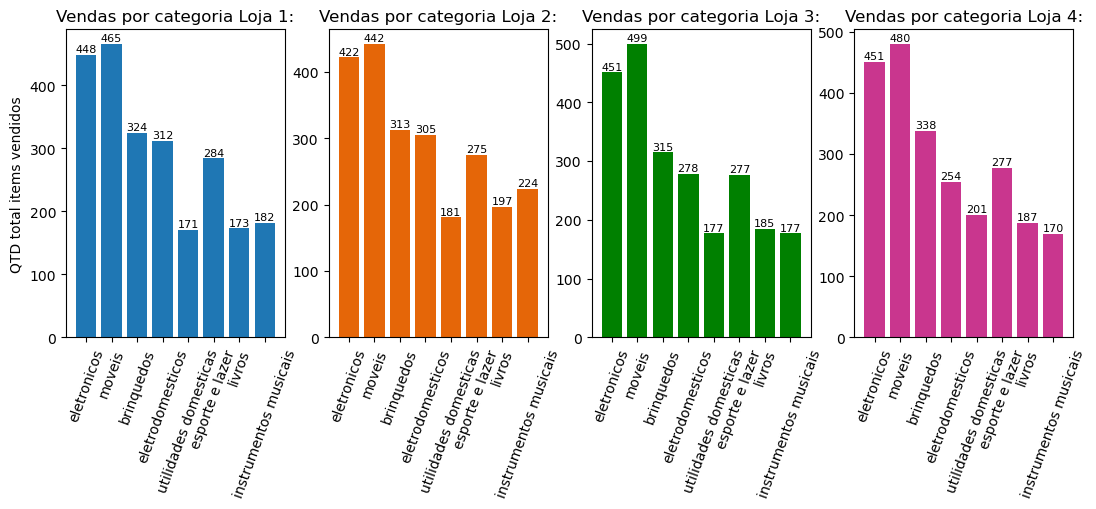

In [98]:
# --------------------------------------------
# Observando vendas por categoria das 4 lojas:
# --------------------------------------------

import matplotlib.pylab as plt


def porValoresNasBarras(vlsDasBarras, colunaGrafico):
  for i, valor in enumerate(vlsDasBarras):
    colunaGrafico.text(
        i,
        valor + 1,
        str(valor),
        ha='center',
        va='bottom',
        fontsize=8)

# Criando figura com 1 linha e 4 colunas (cada subgráfico se chama subplot):
fig, axs = plt.subplots(1,4,figsize=(13,4))

# Gráfico Loja 1:
categorias = getCategoriasProds()
valores = extrairQtdVendasLoja()

axs[0].bar(categorias, valores)
axs[0].set_title('Vendas por categoria Loja 1:')
axs[0].tick_params(axis='x', rotation=70)
axs[0].set_ylabel('QTD total items vendidos')

# Adicionando valores das vendas em cada barra do sub-gráfico 1:
porValoresNasBarras(valores,axs[0])



# Gráfico Loja 2:
categorias2 = getCategoriasProds()
valores2 = extrairQtdVendasLoja(2)

axs[1].bar(categorias2, valores2, color="#e56608")
axs[1].set_title('Vendas por categoria Loja 2:')
axs[1].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 2:
porValoresNasBarras(valores2,axs[1])



# Gráfico Loja 3:
categorias3 = getCategoriasProds()
valores3 = extrairQtdVendasLoja(3)

axs[2].bar(categorias3, valores3, color="green")
axs[2].set_title('Vendas por categoria Loja 3:')
axs[2].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 3:
porValoresNasBarras(valores3,axs[2])



# Gráfico Loja 4:
categorias4 = getCategoriasProds()
valores4 = extrairQtdVendasLoja(4)

axs[3].bar(categorias4, valores4, color="#c9368e")
axs[3].set_title('Vendas por categoria Loja 4:')
axs[3].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 4:
porValoresNasBarras(valores4,axs[3])

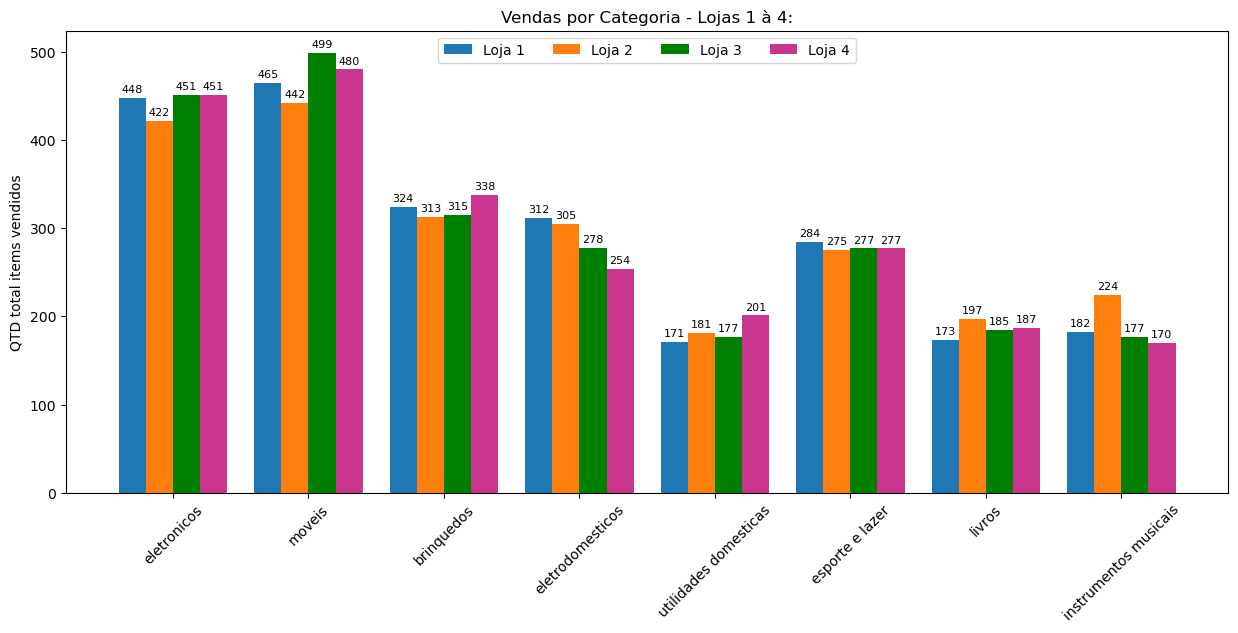

In [99]:
# --------------------------------------------
# Observando vendas por categoria das 4 lojas:
# OBS: Dessa vez, aglutinando categorias
# --------------------------------------------

import matplotlib.pyplot as plt
import numpy as np

# Transferindo informações das vendas das 4 lojas
# para variável com nome mais prático:
_m = ctgGlobalVendasPorCategoria

# Categorias de Produtos:
categorias = getCategoriasProds()

_loja1_ = [_m[0][1][1], _m[0][2][1], _m[0][3][1], _m[0][4][1], _m[0][5][1], _m[0][6][1], _m[0][7][1], _m[0][8][1]]
_loja2_ = [_m[1][1][1], _m[1][2][1], _m[1][3][1], _m[1][4][1], _m[1][5][1], _m[1][6][1], _m[1][7][1], _m[1][8][1]]
_loja3_ = [_m[2][1][1], _m[2][2][1], _m[2][3][1], _m[2][4][1], _m[2][5][1], _m[2][6][1], _m[2][7][1], _m[2][8][1]]
_loja4_ = [_m[3][1][1], _m[3][2][1], _m[3][3][1], _m[3][4][1], _m[3][5][1], _m[3][6][1], _m[3][7][1], _m[3][8][1]]

# Número Categorias + Posições no Eixo X (Horizontal):
numCategorias = len(categorias)
posicoesEixoX = np.arange(numCategorias)
# Largura Barras:
larguraBarras = 0.20

# Criação das figuras e os eixos do gráfico:
fig, ax = plt.subplots(figsize=(15,6))

# Barras Loja 1:
barra1 = ax.bar(
    posicoesEixoX + (larguraBarras*0),
    _loja1_, width=larguraBarras,
    label="Loja 1")

# Barras Loja 2:
barra2 = ax.bar(
    posicoesEixoX + (larguraBarras*1),
    _loja2_, width=larguraBarras,
    label="Loja 2")

# Barras Loja 3:
barra3 = ax.bar(
    posicoesEixoX + (larguraBarras*2),
    _loja3_, width=larguraBarras,
    label="Loja 3", color="green")

# Barras Loja 4:
barra4 = ax.bar(
    posicoesEixoX + (larguraBarras*3),
    _loja4_, width=larguraBarras,
    label="Loja 4", color="#c9368e")

# Função para por valoras acima das barras do meu gráfico:
def porValoresAcimaDasBarras(
    listValoresCateg,
    eixoPadrao,
    nivelDesloc):

  for i, vl in enumerate(listValoresCateg):
    eixoPadrao.text(
        i + nivelDesloc,
        vl + 4,
        str(vl),
        ha='center',
        va='bottom',
        fontsize=8
    )

# Utilizando minha função em cada grupo de barras:
porValoresAcimaDasBarras(_loja1_, ax, (larguraBarras*0))
porValoresAcimaDasBarras(_loja2_, ax, (larguraBarras*1))
porValoresAcimaDasBarras(_loja3_, ax, (larguraBarras*2))
porValoresAcimaDasBarras(_loja4_, ax, (larguraBarras*3))

# 1) Objeto responsável por centralizar rórulos do eixo X +
# 2) Objeto responsá. por etiquetas do eixo X:
obj_centralizacao_barras = ax.set_xticks(posicoesEixoX + larguraBarras*1.5)
obj_etiquetas_categorias = ax.set_xticklabels(
    categorias,
    fontsize=10,
    rotation=45)

# Legendas e Título do Gráfico:
legendaDasCores = ax.legend()
legendaSuperior = ax.set_title("Vendas por Categoria - Lojas 1 à 4:")


ax.set_ylabel('QTD total items vendidos', fontsize=10)
ax.legend(loc='upper center', ncols=4)
plt.show()

# 3. Média de Avaliação das Lojas

In [100]:
# Calculando a média individual de
# avaliação de cada loja:

import numpy as np

# Definir qual loja será lida:
def escolher_loja(numLoja = None):
  if numLoja is not None:
    return globals()[f'loja{numLoja}']
  else: return globals()['loja']

def getMediaAvlLoja(lojaEscolhida):
  mediaAval = 0
  mediaAval = np.average(lojaEscolhida['Avaliação da compra'])
  return float(mediaAval)

print('Média de Avaliação Loja 1:', round(getMediaAvlLoja(loja),2))
print('Média de Avaliação Loja 2:', round(getMediaAvlLoja(loja2),2))
print('Média de Avaliação Loja 3:', round(getMediaAvlLoja(loja3),2))
print('Média de Avaliação Loja 4:', round(getMediaAvlLoja(loja4),2))

Média de Avaliação Loja 1: 3.98
Média de Avaliação Loja 2: 4.04
Média de Avaliação Loja 3: 4.05
Média de Avaliação Loja 4: 4.0


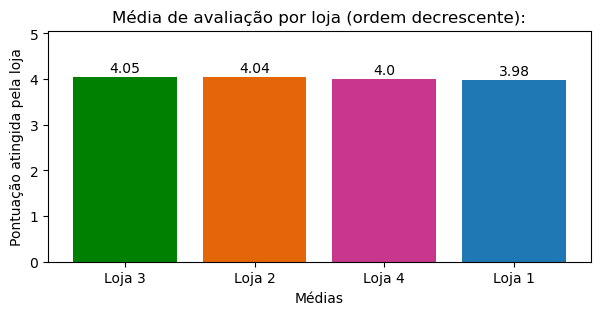

In [101]:
# Gerando gráfico de médias em ordem decrescente
# conforme os dados obtidos acima:

import matplotlib.pylab as plt

# Dados utilizados:
categorias = [
    'Loja 1',
    'Loja 2',
    'Loja 3',
    'Loja 4'
]

valores = [
    getMediaAvlLoja(loja),
    getMediaAvlLoja(loja2),
    getMediaAvlLoja(loja3),
    getMediaAvlLoja(loja4)
]

cores_lojas = [
    '#1f77b4',
    '#e56608',
    'green',
    '#c9368e'
]

# Ordenando lojas com maior média:
array_lojas = list(zip(categorias,valores, cores_lojas))

lista_ordenada = sorted(
    array_lojas,
    key=lambda idxArray: idxArray[1],
    reverse=True)

categorias_ordenadas = [lista_ordenada[i][0] for i in range(len(lista_ordenada))]
valores_ordenados = [lista_ordenada[i][1] for i in range(len(lista_ordenada))]
cores_ordenadas = [lista_ordenada[i][2] for i in range(len(lista_ordenada))]

# Montando Gráfico:
plt.figure(figsize=(7,3))
plt.title('Média de avaliação por loja (ordem decrescente):')
plt.bar(
    categorias_ordenadas,
    valores_ordenados, color=cores_ordenadas)

for i, vlr in enumerate(valores_ordenados):
  plt.text(
      i,
      vlr + vlr/100,
      str(round(vlr, 2)),
      ha='center',
      va='bottom',
      fontsize=10)

plt.ylabel('Pontuação atingida pela loja')
plt.xlabel('Médias')
plt.ylim(0, max(valores_ordenados) * 1.25) # Ajustei o limite do meu eixo Y
plt.show()                                 # para acomodar a etiqueta acima das barrinhas.

# 4. Produtos Mais e Menos Vendidos

In [102]:
# Função para obter lista de produtos (+) e (-)
# vendidos de uma loja:

from collections import Counter

def getCincoItemsMaisMenosVendidos(numLoja=None):
    loja = escolher_loja(numLoja)
    count_frquencia_prods = Counter(loja['Produto'])
    cinco_mais_freq = count_frquencia_prods.most_common(5)
    cinco_menos_freq = count_frquencia_prods.most_common()[:-6:-1]
    return {
        'cinco_mais_vendidos': cinco_mais_freq,
        'cinco_menos_vendidos': cinco_menos_freq[::-1],
    }

In [103]:
getCincoItemsMaisMenosVendidos()

{'cinco_mais_vendidos': [('Micro-ondas', 60),
  ('TV Led UHD 4K', 60),
  ('Guarda roupas', 60),
  ('Secadora de roupas', 58),
  ('Blocos de montar', 56)],
 'cinco_menos_vendidos': [('Mochila', 39),
  ('Pandeiro', 36),
  ('Panela de pressão', 35),
  ('Headset', 33),
  ('Celular ABXY', 33)]}

In [133]:
# ---------------------
# Análise COMPLEMENTAR: <-- Presente no relatório Final
# ---------------------
# Buscando saber as CATEGORIAS dos items 
# mais e menos vendidos.

from collections import Counter

def getCincoItemsMaisMenosVendidos_2(numLoja=None):
    loja = escolher_loja(numLoja)
    x = list(zip(loja['Produto'], loja['Categoria do Produto']))
    count_frquencia_prods = Counter(x)
    cinco_mais_freq = count_frquencia_prods.most_common(5)
    cinco_menos_freq = count_frquencia_prods.most_common()[:-6:-1]
    
    return { 'cinco_mais_vendidos': cinco_mais_freq, 
            'cinco_menos_vendidos': cinco_menos_freq[::-1] }

In [128]:
getCincoItemsMaisMenosVendidos_2()

{'cinco_mais_vendidos': [(('Micro-ondas', 'eletrodomesticos'), 60),
  (('TV Led UHD 4K', 'eletronicos'), 60),
  (('Guarda roupas', 'moveis'), 60),
  (('Secadora de roupas', 'eletrodomesticos'), 58),
  (('Blocos de montar', 'brinquedos'), 56)],
 'cinco_menos_vendidos': [(('Mochila', 'esporte e lazer'), 39),
  (('Pandeiro', 'instrumentos musicais'), 36),
  (('Panela de pressão', 'utilidades domesticas'), 35),
  (('Headset', 'eletronicos'), 33),
  (('Celular ABXY', 'eletronicos'), 33)]}

In [130]:
getCincoItemsMaisMenosVendidos_2(2)

{'cinco_mais_vendidos': [(('Iniciando em programação', 'livros'), 65),
  (('Micro-ondas', 'eletrodomesticos'), 62),
  (('Bateria', 'instrumentos musicais'), 61),
  (('Pandeiro', 'instrumentos musicais'), 58),
  (('Violão', 'instrumentos musicais'), 58)],
 'cinco_menos_vendidos': [(('Fone de ouvido', 'eletronicos'), 37),
  (('Poltrona', 'moveis'), 35),
  (('Mesa de jantar', 'moveis'), 34),
  (('Impressora', 'eletronicos'), 34),
  (('Jogo de tabuleiro', 'brinquedos'), 32)]}

In [131]:
getCincoItemsMaisMenosVendidos_2(3)

{'cinco_mais_vendidos': [(('Kit banquetas', 'moveis'), 57),
  (('Mesa de jantar', 'moveis'), 56),
  (('Cama king', 'moveis'), 56),
  (('Cômoda', 'moveis'), 55),
  (('Jogo de panelas', 'utilidades domesticas'), 55)],
 'cinco_menos_vendidos': [(('Copo térmico', 'esporte e lazer'), 38),
  (('Jogo de copos', 'utilidades domesticas'), 36),
  (('Mochila', 'esporte e lazer'), 36),
  (('Micro-ondas', 'eletrodomesticos'), 36),
  (('Blocos de montar', 'brinquedos'), 35)]}

In [132]:
getCincoItemsMaisMenosVendidos_2(4)

{'cinco_mais_vendidos': [(('Cama box', 'moveis'), 62),
  (('Faqueiro', 'utilidades domesticas'), 59),
  (('Dashboards com Power BI', 'livros'), 56),
  (('Cama king', 'moveis'), 56),
  (('Cômoda', 'moveis'), 55)],
 'cinco_menos_vendidos': [(('Lavadora de roupas', 'eletrodomesticos'), 38),
  (('Ciência de dados com python', 'livros'), 38),
  (('Violão', 'instrumentos musicais'), 37),
  (('Guarda roupas', 'moveis'), 34),
  (('Guitarra', 'instrumentos musicais'), 33)]}

In [106]:
# Carregando dados para preencher
# Gráfico de Barras abaixo:

def getInfo(numLoja=None,opc='maisV'):
    categ = ""
    if opc == 'maisV' or opc == None: 
        categ = 'cinco_mais_vendidos'
    elif opc == "menosV": 
        categ = 'cinco_menos_vendidos'

    loja_info = getCincoItemsMaisMenosVendidos(numLoja)
    loja_info = loja_info[categ]
    return loja_info

In [107]:

# Número de vendas dos items MENOS e Mais vendidos das lojas:

# Loja 4:
x4 = [getInfo(4,'menosV')[i][-1] for i in range(0,5)]
x4b = [getInfo(4)[i][-1] for i in range(0,5)]
# Loja 3:
x3 = [getInfo(3,'menosV')[i][-1] for i in range(0,5)]
x3b = [getInfo(3)[i][-1] for i in range(0,5)]
# Loja 2:
x2 = [getInfo(2,'menosV')[i][-1] for i in range(0,5)]
x2b = [getInfo(2)[i][-1] for i in range(0,5)]
# Loja 1:
x1 = [getInfo(None,'menosV')[i][-1] for i in range(0,5)]
x1b = [getInfo(None)[i][-1] for i in range(0,5)]

In [108]:
# Nomes dos items MENOS e MAIS vendidos das lojas:

# Loja 4:
x4_ = [getInfo(4,'menosV')[i][0] for i in range(0,5)]
x4b_ = [getInfo(4)[i][0] for i in range(0,5)]
# Loja 3:
x3_ = [getInfo(3,'menosV')[i][0] for i in range(0,5)]
x3b_ = [getInfo(3)[i][0] for i in range(0,5)]
# Loja 2:
x2_ = [getInfo(2,'menosV')[i][0] for i in range(0,5)]
x2b_ = [getInfo(2)[i][0] for i in range(0,5)]
# Loja 1:
x1_ = [getInfo(None,'menosV')[i][0] for i in range(0,5)]
x1b_ = [getInfo(None)[i][0] for i in range(0,5)]

In [109]:
# Gerador de frases para legendas dos segmentos de barras:
def getFrase(arg1,arg2):
    return f'"{arg1}"\nnº vendas: {arg2}'

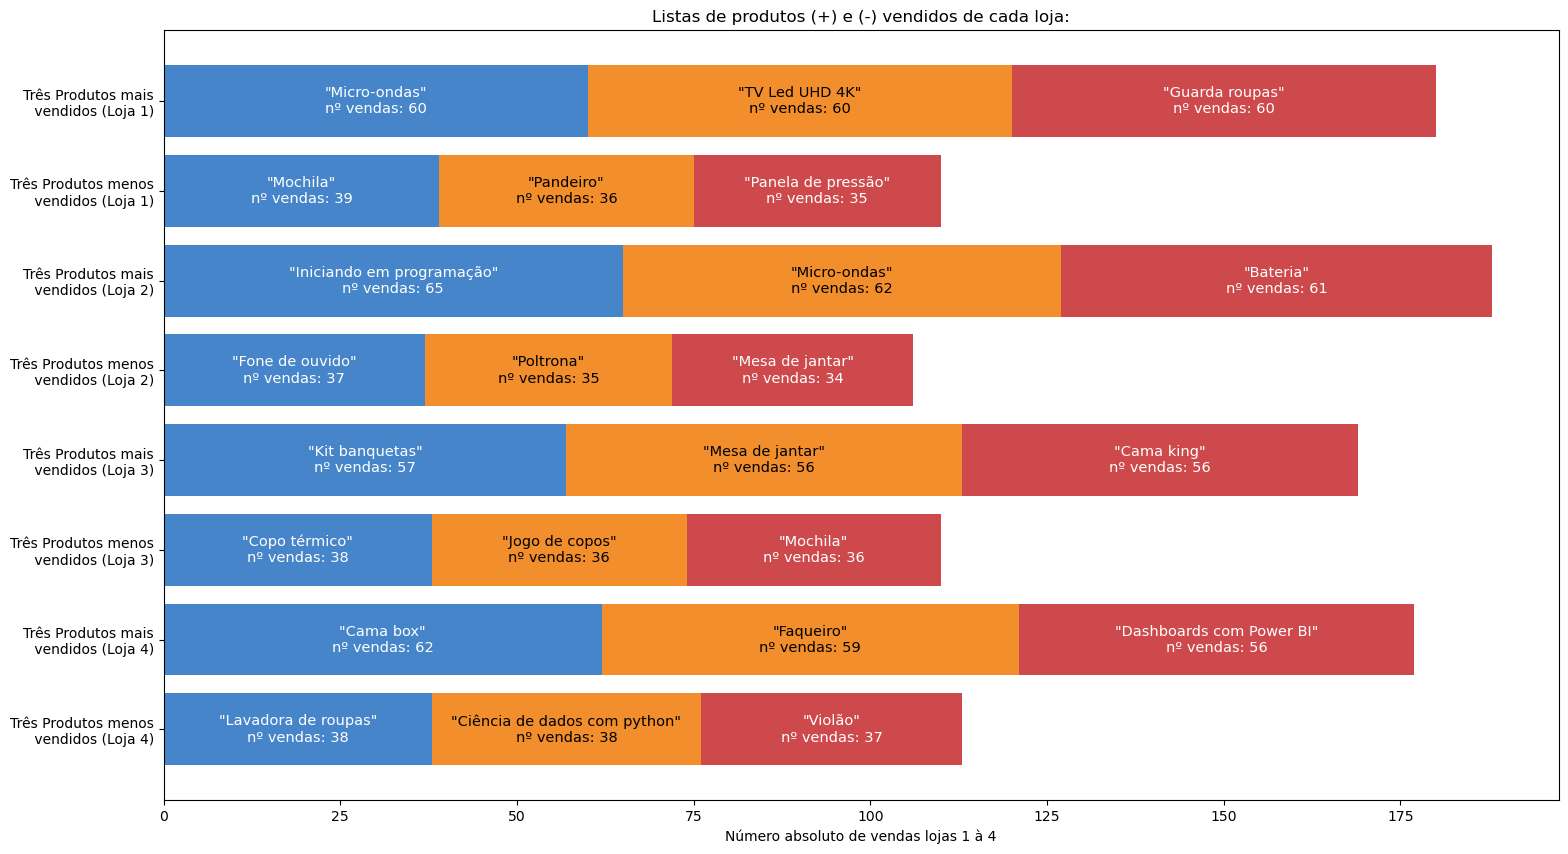

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Categorias Principais:
categorias = [
    'Três Produtos menos\n vendidos (Loja 4)',
    'Três Produtos mais\n vendidos (Loja 4)',
    'Três Produtos menos\n vendidos (Loja 3)',
    'Três Produtos mais\n vendidos (Loja 3)',
    'Três Produtos menos\n vendidos (Loja 2)',
    'Três Produtos mais\n vendidos (Loja 2)',
    'Três Produtos menos\n vendidos (Loja 1)',
    'Três Produtos mais\n vendidos (Loja 1)'
]

# Dados dos segmentos empilhados para cada grupo
# Cada sub-lista representa um "andar/camada" dos arrays abaixo:

valores_segumento1 = [x4[0],x4b[0],x3[0],x3b[0],x2[0],x2b[0],x1[0],x1b[0]] # segmento azul
valores_segumento2 = [x4[1],x4b[1],x3[1],x3b[1],x2[1],x2b[1],x1[1],x1b[1]] # segmento laranja
valores_segumento3 = [x4[2],x4b[2],x3[2],x3b[2],x2[2],x2b[2],x1[2],x1b[2]] # segmento vermelho

valores_por_segmento = [ 
    valores_segumento1, 
    valores_segumento2, 
    valores_segumento3
]

# Cores que serão usadas em cada segmento
cores_segmentos_barras = [ "#4685c9","#f28e2b", "#ce494b" ]

# Textos os quais ficarão dentro de cada segmento de barra:
txts_num_vendas = np.array([
    [getFrase(x4_[0],x4[0]),getFrase(x4b_[0],x4b[0]),getFrase(x3_[0],x3[0]),getFrase(x3b_[0],x3b[0]),getFrase(x2_[0],x2[0]),getFrase(x2b_[0],x2b[0]),getFrase(x1_[0],x1[0]),getFrase(x1b_[0],x1b[0])],
    [getFrase(x4_[1],x4[1]),getFrase(x4b_[1],x4b[1]),getFrase(x3_[1],x3[1]),getFrase(x3b_[1],x3b[1]),getFrase(x2_[1],x2[1]),getFrase(x2b_[1],x2b[1]),getFrase(x1_[1],x1[1]),getFrase(x1b_[1],x1b[1])],
    [getFrase(x4_[2],x4[2]),getFrase(x4b_[2],x4b[2]),getFrase(x3_[2],x3[2]),getFrase(x3b_[2],x3b[2]),getFrase(x2_[2],x2[2]),getFrase(x2b_[2],x2b[2]),getFrase(x1_[2],x1[2]),getFrase(x1b_[2],x1b[2])]
])

# Índices das posições dos grupos no eixo Y
posicoes_y = np.arange(len(categorias))

# Aparência do meu gráfico de barras horizontais:
figura, ax = plt.subplots(figsize=(18,10))

# Variável responsável pelo início da posição das minhas barras:
inicio_barras = np.zeros(len(categorias))


# A1:
# Criando minhas barras individualmente:
barras_criadas = []

for idx, valor in enumerate(valores_por_segmento):
    nova_barra = ax.barh(
        y=posicoes_y,
        width=valor,
        color=cores_segmentos_barras[idx],
        align='center',
        left=inicio_barras
    )
    inicio_barras += valor
    barras_criadas.append(nova_barra)

# A2:
# Adicionando os textos de PORCENTAGEM no centro de cada segmento
# das minhas barras:

for indice_segmento, grupo_de_barras in enumerate(barras_criadas):
    for indice_grupo, barra in enumerate(grupo_de_barras):
        
        centro_x = barra.get_x() + barra.get_width() / 2
        centro_y = barra.get_y() + barra.get_height() / 2
        texto = txts_num_vendas[indice_segmento][indice_grupo]

        corTxt = ""

        if indice_segmento % 2 == 0:
            corTxt = "#fff"
        else:
            corTxt = "#000"

        ax.text(
            x=centro_x,
            y=centro_y,
            s=f'{texto}',
            ha="center", va="center", 
            fontsize=10.5,
            color=corTxt)
        
# Ajustes na aparência do gráfico:
ax.set_yticks(posicoes_y)
ax.set_yticklabels(categorias)
ax.set_xlabel('Número absoluto de vendas lojas 1 à 4')
ax.set_title('Listas de produtos (+) e (-) vendidos de cada loja:')

plt.show()

# 5. Frete Médio por Loja


In [111]:
# Coletando médias de frete das lojas 1 à 4:

def calcMediaFrete(lojaEscolhida):
    somaItems = sum(lojaEscolhida['Frete']) 
    numItems = len(lojaEscolhida['Frete'])
    mediaF = round(somaItems/numItems, 2)
    return mediaF

mediasFrete = []
m1 = calcMediaFrete(loja)
m2 = calcMediaFrete(loja2)
m3 = calcMediaFrete(loja3)
m4 = calcMediaFrete(loja4)
mediasFrete.extend([m1,m2,m3,m4])

mediasFrete

[34.69, 33.62, 33.07, 31.28]

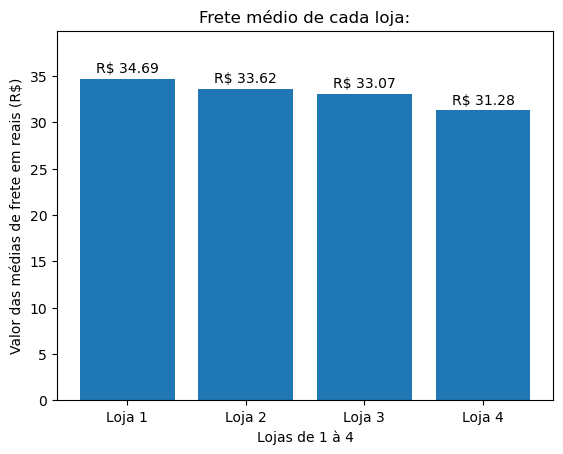

In [112]:
# Apresentando 
# médias de frete das lojas 1 à 4:

import matplotlib.pyplot as plt

# Dados Gráfico de barras (Meu array de médias de fretes):
valoresBarras = mediasFrete
nomesLojas = ['Loja 1','Loja 2','Loja 3','Loja 4']

plt.bar(nomesLojas, valoresBarras)
plt.title('Frete médio de cada loja:')
plt.xlabel('Lojas de 1 à 4')
plt.ylabel('Valor das médias de frete em reais (R$)')
plt.ylim(0, max(valoresBarras) * 1.15)

for i, valor in enumerate(valoresBarras):
    plt.text(
        i,
        valor + valor/100, 
        f'R$ {valor}', 
        ha='center', 
        va="bottom",
        fontsize=10)

In [113]:
# Capturar dados das vendas 
# e seus fretes em TODAS as lojas:

def juntarDataFrete(lojaEscolhida):
    a = lojaEscolhida['Data da Compra']
    b = lojaEscolhida['Frete']
    return list(zip(a,b))

def adicionarNomeLoja(arrayVendas, numLoja=1):
    return [(venda[0], venda[1], f'loja{numLoja}') for venda in arrayVendas]

def juntarDataFreteNmLoja(lojaEscolhida,numLoja=1):
    return adicionarNomeLoja(juntarDataFrete(lojaEscolhida),numLoja)

vendasLoja1 = juntarDataFreteNmLoja(loja)
vendasLoja2 = juntarDataFreteNmLoja(loja2,2)
vendasLoja3 = juntarDataFreteNmLoja(loja3,3)
vendasLoja4 = juntarDataFreteNmLoja(loja4,4)

vendas_all_lojas = \
    vendasLoja1 + vendasLoja2 + vendasLoja3 + vendasLoja4

vendas_all_lojas

[('16/01/2021', 9.2497899853, 'loja1'),
 ('18/05/2022', 11.2343053621, 'loja1'),
 ('15/03/2021', 21.2626809863, 'loja1'),
 ('03/05/2022', 54.6673442173, 'loja1'),
 ('07/11/2020', 26.9646890964, 'loja1'),
 ('03/12/2020', 0.0, 'loja1'),
 ('07/08/2021', 0.0, 'loja1'),
 ('18/06/2021', 84.9930800049, 'loja1'),
 ('08/01/2022', 105.3728566247, 'loja1'),
 ('24/02/2020', 6.737658724, 'loja1'),
 ('03/04/2020', 170.1978740737, 'loja1'),
 ('05/07/2021', 100.8989674334, 'loja1'),
 ('20/02/2020', 7.0496012363, 'loja1'),
 ('10/09/2020', 2.3186290892, 'loja1'),
 ('04/09/2020', 41.1250365646, 'loja1'),
 ('16/12/2020', 1.6269506684, 'loja1'),
 ('03/05/2022', 1.7659253164, 'loja1'),
 ('22/07/2021', 2.3831872573, 'loja1'),
 ('09/01/2022', 143.8837005579, 'loja1'),
 ('10/01/2020', 13.0235617567, 'loja1'),
 ('11/03/2021', 31.2153682668, 'loja1'),
 ('11/07/2022', 4.1375232659, 'loja1'),
 ('21/04/2022', 36.8078997942, 'loja1'),
 ('06/03/2023', 18.4215842878, 'loja1'),
 ('14/02/2023', 0.0, 'loja1'),
 ('20/03/2

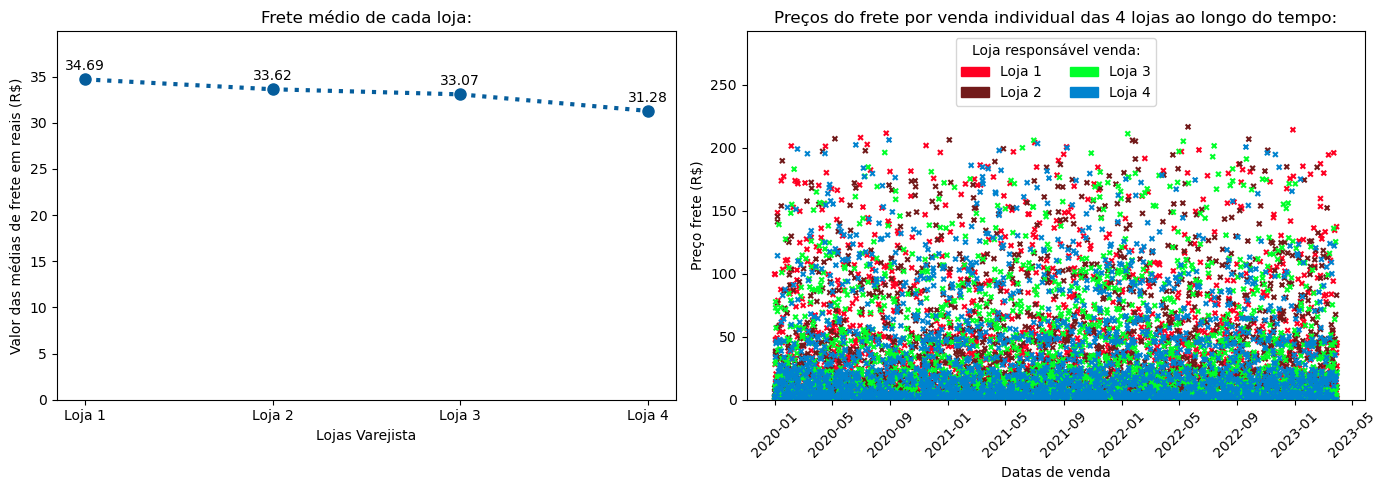

In [114]:
# Apresentando 
# médias de frete das lojas 1 à 4 
# Dessas vez usando um gráfico de linhas + um scatterplot
# EXTRA: (+ dados dos fretes de vendas realizadas durante todo período):

import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch

# Configurando gráfico múltiplo 
# com 1 linha e duas colunas (uma para cada gráfico):

qtdLinhas = 1
qtdColunas = 2
largura = 14
altura = 5

fig, (ax1, ax2) = plt.subplots(
    qtdLinhas, qtdColunas, figsize=(largura,altura))

# -------------------------------------
# Montagem do 1º Subgráfico:
# -------------------------------------

# Dados do Gráfico de Linhas:
valoresLinhas = mediasFrete
nomesLojas = ['Loja 1','Loja 2','Loja 3','Loja 4']

# Montagem do Gráfico de Linhas (em vez de barras - mudei de ideia de novo lol):
# Nota pessoal: Felizmente o gráfico de linhas é fácil de fazer.

ax1.plot(
    nomesLojas, 
    valoresLinhas,
    color="#055d9c",    # cor da linha principal
    marker='o',           # marcadores nos pontos
    linestyle=':',        # estilo da linha
    linewidth=3,          # espessura da linha
    markersize=8)         # tamanho dos marcadores
       

ax1.set_title('Frete médio de cada loja:')
ax1.set_xlabel('Lojas Varejista')
ax1.set_ylabel('Valor das médias de frete em reais (R$)')
ax1.set_ylim(0, max(valoresLinhas) * 1.15)

for i, valor in enumerate(valoresLinhas):
    ax1.text(
        i,
        valor + (valor/100)*2, 
        f'{valor}', 
        ha='center', 
        va="bottom",
        fontsize=10)


    
# -------------------------------------
# Montagem do 2º Subgráfico -
# Gráfico de Dispersão / Scatter Plot (gostei muito desse kkk) 
# para ver preço do frete
# de cada venda ao longo do tempo:
# -------------------------------------

vendas_catalogadas = vendas_all_lojas
datas_eixo_x = [datetime.strptime(venda[0],'%d/%m/%Y') for venda in vendas_catalogadas]
precos_vendas = [(venda[1],venda[2]) for venda in vendas_catalogadas]

cores_scatter_plt = [
    "#FF0022",
    "#721A1A",
    "#00FF2A",
    "#0083CF"
]

# Definir cor de cada (pontinho) preço de venda:
def setCorPontinhoVenda(preco):
    if preco[-1] == 'loja1':
        return cores_scatter_plt[0]
    elif preco[-1] == 'loja2':
        return cores_scatter_plt[1]
    elif preco[-1] == 'loja3':
        return cores_scatter_plt[2]
    elif preco[-1] == 'loja4':
        return cores_scatter_plt[3]
    
cores_precos_vendas = [ setCorPontinhoVenda(preco) 
                        for preco in precos_vendas]

array_vls_monetarios = [           
    p[0] for p in precos_vendas]       

# Montando conteúdo do Scatter Plot:
ax2.scatter(
    datas_eixo_x,
    array_vls_monetarios, # (25.98, 'loja1') => pegei apenas o 25.98
    c=cores_precos_vendas,
    s=12,
    alpha=1,
    marker='x') # Dá pra usar um x também.

ax2.tick_params(axis='x',rotation=45)
ax2.set_title('Preços do frete por venda individual das 4 lojas ao longo do tempo:')
ax2.set_xlabel('Datas de venda')
ax2.set_ylabel('Preço frete (R$)')

legenda_scatter_plot = [
    Patch(color=cores_scatter_plt[0], label='Loja 1'),
    Patch(color=cores_scatter_plt[1], label='Loja 2'),
    Patch(color=cores_scatter_plt[2], label='Loja 3'),
    Patch(color=cores_scatter_plt[3], label='Loja 4')
]

ax2.legend(
    handles=legenda_scatter_plot, 
    title="Loja responsável venda:",
    loc='upper center',
    ncols=2)


plt.tight_layout()
plt.ylim(0,max(array_vls_monetarios) * 1.35)
plt.show()


---
# 📜 **Relatório Final:**
---
### **1. Análise Faturamento lojas:**
![grafico_ex1](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/1_faturamento_lojas.png)

Baseando-se no gráfico acima, observa-se que:
- A loja 1 lidera em vendas brutas.
- A loja 4 possui o menor faturamento de todas.

---
### **2. Análise de Vendas por Categoria:**
![grafico1_ex2](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/2_vendas_por_categoria_A_.png)
![grafico2_ex2](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/2_vendas_por_categoria_B.png)

Observa-se nos dois gráficos acima que:
- I. Todas as lojas ofertam o mesmo tipo de produtos, variando apenas o número de vendas por loja.
- II. A categoria de produtos mais comprada nas 4 lojas é a de móveis.
- III. Observa-se que há 3 categorias com menor índice de vendas, sendo elas: 
    - 1º: *Utilidades domésticas*; 
    - 2º: *Livros*;
    - 3º: *Intrumentos Musicais*.

Observando o próprio gráfico acima, a categoria com menor **média** de vendas seria:

$$
\begin{array}{l}
\text{Utilidades domesticas} = \frac{171 + 181 + 177 + 201}{4} = 182.5 = x\\[6pt]
\text{Livros} = \frac{173+197+185+187}{4} = 185.5 = y\\[6pt]
\text{Instrumentos Musicais} = \frac{182 + 224 + 177 + 170}{4} = 188.25 = z\\[6pt]
\text{Logo: } z > y > x
\end{array}
$$

Logo a categoria com menor média de vendas é *Utilidades domésticas*.

Concluímos então, com base  no gráfico acima que em ordem de items vendidos, temos
as seguintes *médias de vendas por categoria*:

 - 1º Lugar: *Móveis*.
 - 2º Lugar: *Eletrônicos*.
 - 3º Lugar: *Brinquedos*.
 - 4º Lugar: *Eletrodomésticos*.
 - 5º Lugar: *Eporte e Lazer*.
 - 6º Lugar: *Instrumentos Musicais*.
 - 7º Lugar: *Livros*.
 - 8º Lugar: *Utilidades Domésticas*.

---
### **3. Análise da Média de avaliação das lojas:**

![grafico3](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/3_media_avaliacao_lojas.png)

Todas as lojas possuem avaliações ligeiramente diferentes umas das outras. Com:
- I. A Loja 3 tendo o maior desempenho nesse quesito.
- II. A Loja 1 possuindo o pior desempenho.

---
### **4. Análise dos Produtos Mais e Menos vendidos de cada loja:**

![grafico4](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/4_prods_mais_menos_vendidos.png)

Utilizando-se do gráfico acima, mais do *código abaixo* (localizado nas análises feitas)

```python
    def getCincoItemsMaisMenosVendidos_2(numLoja=None):
        loja = escolher_loja(numLoja)
        x = list(zip(loja['Produto'], loja['Categoria do Produto']))
        count_frquencia_prods = Counter(x)
        cinco_mais_freq = count_frquencia_prods.most_common(5)
        cinco_menos_freq = count_frquencia_prods.most_common()[:-6:-1]
        
        return { 'cinco_mais_vendidos': cinco_mais_freq, 
                'cinco_menos_vendidos': cinco_menos_freq[::-1] }
```

Foram-se obtidos os items com maiores e menores índices de vendas por loja individual e suas categorias. Em conjunto com informações presentes na análise de vendas por categoria, é visto:

<table>
  <thead>
    <tr>
        <th colspan="3">
            Loja 1 - Produtos (<span style="color:blue;">+</span>) Vendidos</th>
        </tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<table>
  <thead>
    <tr><th colspan="3">Loja 1 - Produtos (<span style="color:red;">-</span>) Vendidos</th></tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<br>

<table>
  <thead>
    <tr>
        <th colspan="3">
            Loja 2 - Produtos (<span style="color:blue;">+</span>) Vendidos</th>
        </tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<table>
  <thead>
    <tr><th colspan="3">Loja 2 - Produtos (<span style="color:red;">-</span>) Vendidos</th></tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<br>

<table>
  <thead>
    <tr>
        <th colspan="3">
            Loja 3 - Produtos (<span style="color:blue;">+</span>) Vendidos</th>
        </tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<table>
  <thead>
    <tr><th colspan="3">Loja 3 - Produtos (<span style="color:red;">-</span>) Vendidos</th></tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<br>

<table>
  <thead>
    <tr>
        <th colspan="3">
            Loja 4 - Produtos (<span style="color:blue;">+</span>) Vendidos</th>
        </tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>

<table>
  <thead>
    <tr><th colspan="3">Loja 4 - Produtos (<span style="color:red;">-</span>) Vendidos</th></tr>
    <tr>
      <th>Nome Produto</th>
      <th>Nome Categoria</th>
      <th>Ranking Média Vendas Categoria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Produto 1</td>
      <td>Categoria A</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 2</td>
      <td>Categoria B</td>
      <td></td>
    </tr>
    <tr>
      <td>Produto 3</td>
      <td>Categoria C</td>
      <td></td>
    </tr>
  </tbody>
</table>


### **5. Análise do Frete médio de vendas realizadas por loja:**

![grafico5](https://raw.githubusercontent.com/Megalonnix/ChallengeAluraStore/refs/heads/master/images/5_media_frete_por_loja.png)